In [140]:
%matplotlib inline
from matplotlib import style
import pandas as pd 
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from sqlalchemy import and_
from pandas import DataFrame


In [141]:
import numpy as np
import pandas as pd

In [142]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [143]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [144]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [145]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [146]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [147]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Base.classes.measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [148]:
# Create our session (link) from Python to the DB
session = Session(engine)
Base.classes.station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

# Exploratory Climate Analysis

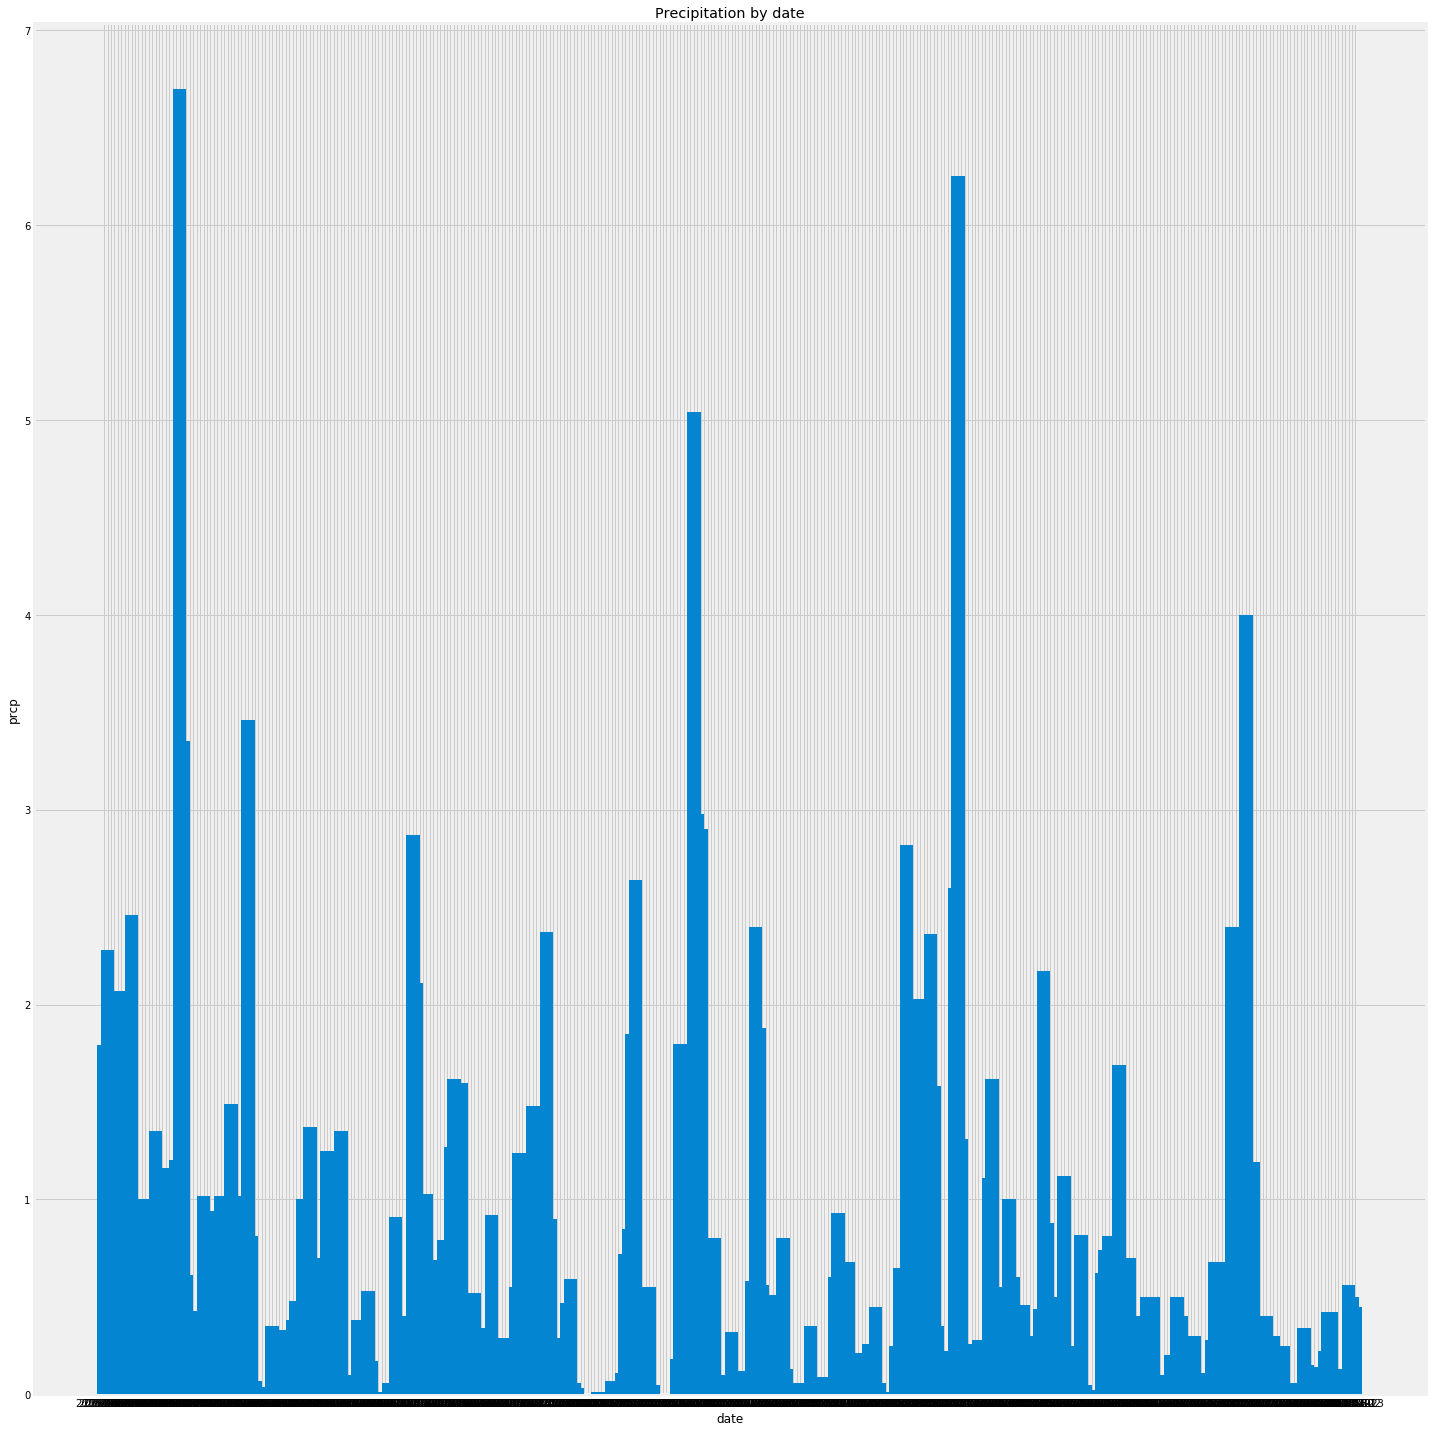

In [149]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


#sel = [func.avg(Measurement.prcp),Measurement.date
 #     ]
#may_averages = session.query(*sel).\
   # order_by(Measurement.date).all()
#may_averages

# Calculate the date 1 year ago from the last data point in the database

Base.classes.measurement.__table__.columns.keys()

maxdate= session.query(func.max(Measurement.date)).scalar()

v=str(maxdate)
v, space, time = v.partition(' ')
maxdate=dt.datetime.strptime(v, '%Y-%m-%d').date()
yearbackdate = maxdate + relativedelta(months=-12)

# Perform a query to retrieve the data and precipitation scores
sel = [(Measurement.prcp),Measurement.date
      ]
may_averages =pd.DataFrame(session.query(*sel).\
    filter(and_(Measurement.date <=maxdate , Measurement.date >=yearbackdate,Measurement.prcp !='None')).\
    order_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
may_averages.set_index('date', inplace=True)
may_averages.reset_index(inplace = True) 
# Sort the dataframe by date
may_averages.sort_values(by=['date'])
may_averages
# Use Pandas Plotting with Matplotlib to plot the data
# Create a list indicating where to write x labels and set figure size to adjust for space
# add some

plt.figure(figsize=(20,20))
plt.bar(may_averages["date"], may_averages["prcp"], color='#0485d1', alpha=1, align="center",width=4,zorder=5)
#plt.xticks(tick_locations, may_averages["date"], rotation="vertical")
plt.ylabel('prcp')
plt.xlabel('date')
plt.title('Precipitation by date')
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [138]:
# Use Pandas to calcualte the summary statistics for the precipitation data
may_averages.round(decimals=6)
total_prcp=may_averages["prcp"].count()
mean_prcp=may_averages["prcp"].mean()
std_prcp=may_averages["prcp"].std()
min_prcp=may_averages["prcp"].min()
_25percent_prcp=may_averages["prcp"].quantile(0.25)
_50percent_prcp=may_averages["prcp"].quantile(0.5)
_75percent_prcp=may_averages["prcp"].quantile(0.75)
max_prcp=may_averages["prcp"].max()
summary_df= pd.DataFrame({"count": total_prcp,
                              "mean": [mean_prcp],
                              "std": [std_prcp],
                              "min": [min_prcp],
                              "25%": [_25percent_prcp],
                              "50%": [_50percent_prcp],
                              "75%": [_75percent_prcp],
                              "max": [max_prcp]
                         })
summary_df = summary_df.T
summary_df=summary_df.rename(columns={0:'precipitation'})
summary_df.head(10)
summary_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [23]:
# Plot the daily normals as an area plot with `stacked=False`
